## Mon premier histogrammme

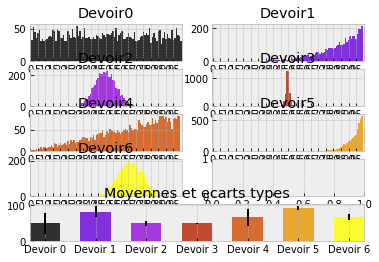

In [53]:
"""
This example demonstrates the "bmh" style, which is the design used in the
Bayesian Methods for Hackers online book.
"""
from numpy.random import uniform, power, poisson, laplace
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('bmh')

nb_etu = 4000
n_max = 100

devoir = [[np.floor(i) for i in uniform(0, n_max+1, nb_etu)],
          [np.floor(j) for j in n_max*power(5, nb_etu)],
          [np.floor(k) for k in poisson(n_max/2, nb_etu)],
          [np.floor(l) for l in laplace(n_max/2, 1, nb_etu)],
          [np.floor(j) for j in n_max*power(2, nb_etu)],
          [np.floor(j) for j in n_max*power(15, nb_etu)],
          [np.floor(k) for k in poisson(2*n_max/3, nb_etu)]
         ]

n_dev = len(devoir)
n_row = int(np.ceil(n_dev/2))

ax = [plt.subplot2grid((n_row + 1, 2), (i, j)) for i in range(n_row) for j in range(2)]
ax.append(plt.subplot2grid((n_row + 1, 2), (n_row, 0), colspan=2))


for k in range(n_dev):
    ax[k].set_xlim(0, n_max)    
    
for k in range(n_dev):
    ax[k].set_title('Devoir' + str(k))

ax[-1].set_title('Moyennes et ecarts types')

cmap = plt.get_cmap('gnuplot')
couleur = [cmap(i) for i in np.linspace(0, 1, n_dev)]


for k in range(n_dev):
    ax[k].hist(devoir[k], histtype="bar",
             bins=n_max + 1, range=(0, n_max), alpha=0.8, color = couleur[k])



ind = [k for k in range(0, n_max, 5)]
indx = [round(float(u)*n_max/(n_max+1) + n_max/(2*(n_max+1)), 2) for u in ind]
for k in range(n_dev):
    ax[k].set_xticks(indx)
    ax[k].set_xticklabels(ind)



ax[-1].set_xlim(0, 3*n_dev + 1)
means = [np.mean(d) for d in devoir]
stds = [np.std(d) for d in devoir]
ind = np.linspace(1, 3*n_dev, n_dev)
ax[-1].bar(ind, means, 2,
         alpha=0.8, yerr=stds, label='Moyennes', color=couleur)
ax[-1].set_xticks(ind)
ax[-1].set_xticklabels(['Devoir ' + str(k) for k in range(n_dev)])

plt.show()


## Ma première image

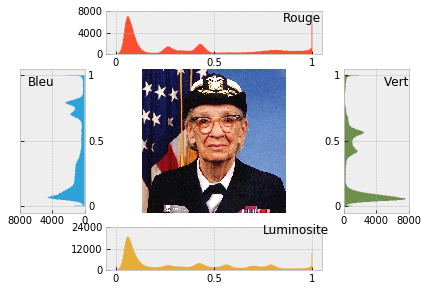

In [42]:
"""
imshow 
"""
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
import matplotlib.cm as cm

urlretrieve('https://download.tuxfamily.org/tehessinmath/les_images/lenaFace.jpeg','lenaFace.jpeg')
urlretrieve('https://people.irisa.fr/Anne-Cecile.Orgerie/images/Grace_Hopper.png','Grace_Hopper.png')
mat=plt.imread('Grace_Hopper.png')
matl = plt.imread('lenaFace.jpeg')
nx,ny,_ = np.shape(mat)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.04

#[left, bottom, width, height]
rect_main = [0.25, 0.25, 0.5, 0.5]
rect_histx = [0.25, 0.8, 0.5, 0.15]
rect_histy = [0.8, 0.25, 0.15, 0.5]
rect_histy2 = [0.05, 0.25, 0.15, 0.5]
rect_histx2 =[0.25, 0.05, 0.5, 0.15]

axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
axHisty2 = plt.axes(rect_histy2)
axHistx2 = plt.axes(rect_histx2)

axHistx.xaxis.set_major_formatter(NullFormatter())
axHistx.yaxis.set_major_formatter(NullFormatter())
axHisty.xaxis.set_major_formatter(NullFormatter())
axHisty.yaxis.set_major_formatter(NullFormatter())
axHistx2.xaxis.set_major_formatter(NullFormatter())
axHistx2.yaxis.set_major_formatter(NullFormatter())
axHisty2.xaxis.set_major_formatter(NullFormatter())
axHisty2.yaxis.set_major_formatter(NullFormatter())

axHistx.set_ylim((0,8000))
axHisty.set_xlim((0,8000))
axHisty2.set_xlim((0,8000))
axHistx2.set_ylim((0,24000))

yti = [0, 4000, 8000]
axHistx.set_yticks(yti)
axHistx.set_yticklabels(yti)
axHisty.set_xticks(yti)
axHisty.set_xticklabels(yti)
axHisty2.set_xticks(yti)
axHisty2.set_xticklabels(yti)
axHistx2.set_yticks([0, 12000, 24000])
axHistx2.set_yticklabels([0, 12000, 24000])

xti = [0, 0.5, 1]
axHistx.set_xticks(xti)
axHistx.set_xticklabels(xti)
axHisty.set_yticks(xti)
axHisty.set_yticklabels(xti)
axHisty2.tick_params(labelleft=False, labelright=True)
axHisty2.set_yticks(xti)
axHisty2.set_yticklabels(xti)
axHistx2.set_xticks(xti)
axHistx2.set_xticklabels(xti)

# start with a rectangular Figure
plt.figure(1, figsize=(8,8))
plt.axes(rect_main)
plt.imshow(mat)
plt.axis('off') # clear x- and y-axes

axHistx.hist(np.reshape(mat[:,:,0],nx*ny), 256, color='#fc4f30', histtype='stepfilled')
#axHistx.set_title('histogramme des rouges')

axHisty.hist(np.reshape(mat[:,:,1],nx*ny), 256, color='#6d904f', orientation='horizontal', histtype='stepfilled')
#axHisty.set_title('histogramme des verts')

axHisty2.invert_xaxis()
axHisty2.hist(np.reshape(mat[:,:,2],nx*ny), 256, color='#30a2da', orientation='horizontal', histtype='stepfilled')

axHistx2.hist(mat[:,:,:].flatten(), 256, range=(0.0,1.0), color='#e5ae38', histtype='stepfilled')


axHistx.text(0.85, 6000, "Rouge", size='large')
axHistx2.text(0.75, 20000, "Luminosite", size='large')
axHisty.text(5000, 0.92, "Vert", size='large')
axHisty2.text(7000,0.92, "Bleu", size='large')

plt.show()


In [54]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

urlretrieve('https://download.tuxfamily.org/tehessinmath/les_images/lenaFace.jpeg','lenaFace.jpeg')
urlretrieve('https://people.irisa.fr/Anne-Cecile.Orgerie/images/Grace_Hopper.png','Grace_Hopper.png')
matgrace=plt.imread('Grace_Hopper.png')
mat = plt.imread('lenaFace.jpeg')

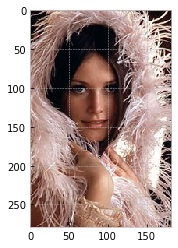

In [55]:
plt.imshow(mat)

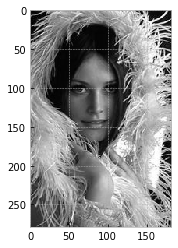

In [56]:
def mono(m):
    r, c, _ = np.shape(m)
    return(np.array([[np.mean(m[i,j]) for j in range(c)] for i in range(r)]))

plt.imshow(mono(mat), cmap=cm.gray)

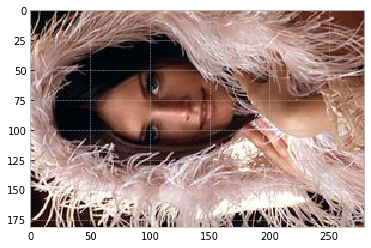

In [57]:
def tourne(m):
    r, c, _ = np.shape(m)
    return(np.array([[m[j,i] for j in range(r)] for i in range(c)]))

plt.imshow(tourne(mat), cmap=cm.gray)

In [58]:
def resolution(mat,k):
    r, c, _ = np.shape(mat)
    return np.array([[mat[k*i,k*j] for j in range(c//k)] for i in range(r//k)])

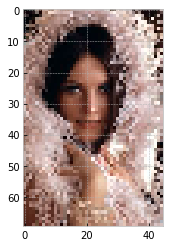

In [59]:
plt.imshow(resolution(mat,4), cmap=cm.gray)

In [60]:
def pauvre(m,k):
    return np.array([np.array([int(np.mean(x)/k) for x in ligne]) for ligne in m])


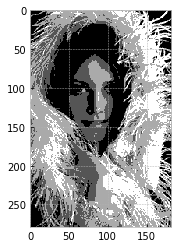

In [61]:
plt.imshow(pauvre(matlena,64), cmap=cm.gray)

## Mon premier 3D

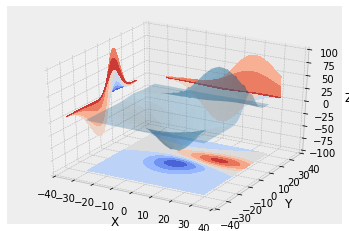

In [62]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()
